In [14]:
from langgraph.graph import StateGraph,START,END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict,Literal
from dotenv import load_dotenv
import math
load_dotenv()


True

## Quadaratic Equation Workflow

Quadratic Equation is always in form 
a^2x+bx+c

In [29]:
class QuadEqn(TypedDict):
    a:int
    b:int
    c:int
    d:float
    equation:str
    result:str

In [30]:
def show_eqn(state:QuadEqn)->QuadEqn:
    equation=f'''({state["a"]}x2)+({state['b']}x)+({state["c"]})'''
    return{'equation':equation}

In [31]:
def calculate_disc(state:QuadEqn)->QuadEqn:
    d=state['b']**2-(4*state['a']*state['c'])
    
    return {'d':d}

In [32]:
def no_real_roots(state:QuadEqn)->QuadEqn:
    result="There are no real roots"
    return {'result':result}

def real_equal(state:QuadEqn)->QuadEqn:
    root=(-state['b'])/(2*state['a'])
    result=f'The root is {root}'
    return {'result':result} 

def real_distinct(state:QuadEqn)->QuadEqn:
    root1=((-state['b'])+math.sqrt(state['d']))/(2*state['a'])
    root2=((-state['b'])-math.sqrt(state['d']))/(2*state['a'])
    
    result=f'The roots are {root1} and {root2}'
    return {'result':result}

In [33]:
def check_condition(state:QuadEqn)->Literal["real_equal","no_real_roots","real_distinct"]:
    if state["d"]==0:
        return "real_equal"
    elif state["d"]>0:
        return "real_distinct"
    else:
        return "no_real_roots"

In [34]:
graph=StateGraph(QuadEqn)

graph.add_node('show_eqn',show_eqn)
graph.add_node('calculate_disc',calculate_disc)
graph.add_node('no_real_roots',no_real_roots)
graph.add_node('real_equal',real_equal)
graph.add_node('real_distinct',real_distinct)

graph.add_edge(START,'show_eqn')
graph.add_edge('show_eqn','calculate_disc')
graph.add_conditional_edges('calculate_disc',check_condition)
graph.add_edge('real_distinct',END)
graph.add_edge('real_equal',END)
graph.add_edge('no_real_roots',END)



workflow=graph.compile()

In [40]:
initial_state={
    'a':2,
    'b':4,
    'c':2
}

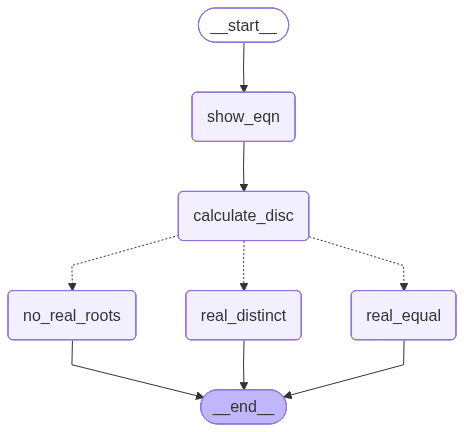

In [41]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [42]:
output=workflow.invoke(initial_state)

In [43]:
print(output)

{'a': 2, 'b': 4, 'c': 2, 'd': 0, 'equation': '(2x2)+(4x)+(2)', 'result': 'The root is -1.0'}
